# Data Cleaning

**Installing libraries**

In [15]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


**Importing Pandas**

In [16]:
import pandas as pd

pd.set_option('display.max_columns', None)

**Importing the data**

In [17]:
df = pd.read_csv(r"C:\Users\moham\OneDrive\Desktop\Swinfy Data Science\Projects\RetailIQ-Analytics\data\Superstore.csv", encoding = 'ISO-8859-1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Getting some imformation**

In [18]:
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

0

**Droping the unusable columns**

In [19]:
df.drop(columns = ['Row ID', 'Country', 'Postal Code'], inplace = True)

**Removing the rows which contains null values**

In [20]:
df.dropna(inplace = True)

**Conerting the date values into datetime format**

In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [22]:
df.to_csv("C:/Users/moham/OneDrive/Desktop/Swinfy Data Science/Projects/RetailIQ-Analytics/data/Superstore_Cleaned.csv", index=False)

# Exploratory Data Analysis (EDA)

**Importing Liabraries**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the cleand file**

In [9]:
df = pd.read_csv(f"C:/Users/moham/OneDrive/Desktop/Swinfy Data Science/Projects/RetailIQ-Analytics/data/Superstore_Cleaned.csv")

## Sales by category

In [26]:
category_sale = df.groupby("Category")["Sales"].sum().sort_values(ascending=True)


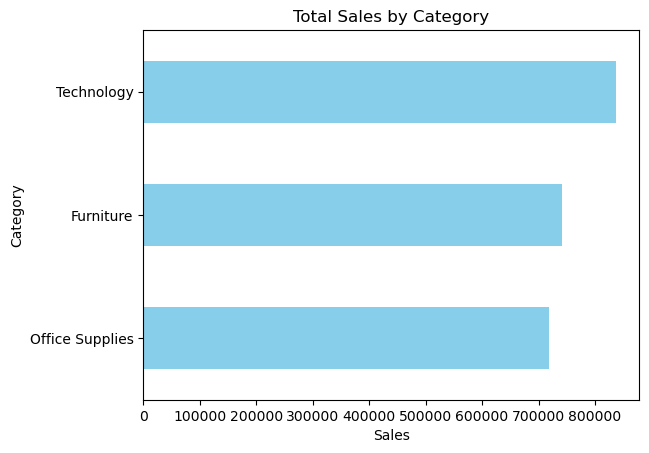

In [27]:
category_sale.plot(kind='barh', color='skyblue')
plt.title("Total Sales by Category")
plt.xlabel("Sales")
plt.ylabel("Category")
plt.show()


## Top Products by Sales

In [28]:
top_productsBYsales = df.groupby("Product Name")["Sales"].sum().sort_values(ascending = False).head(10)

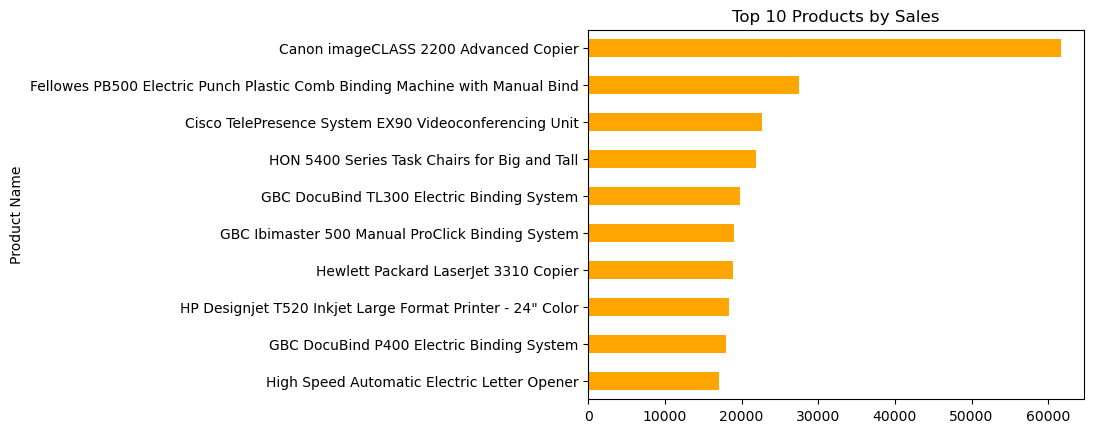

In [29]:
top_productsBYsales.plot(kind='barh', color='orange')
plt.title("Top 10 Products by Sales")
plt.gca().invert_yaxis()
plt.show()

## Most Frequently Sold Products

In [34]:
most_sold_products = df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False).head(10)

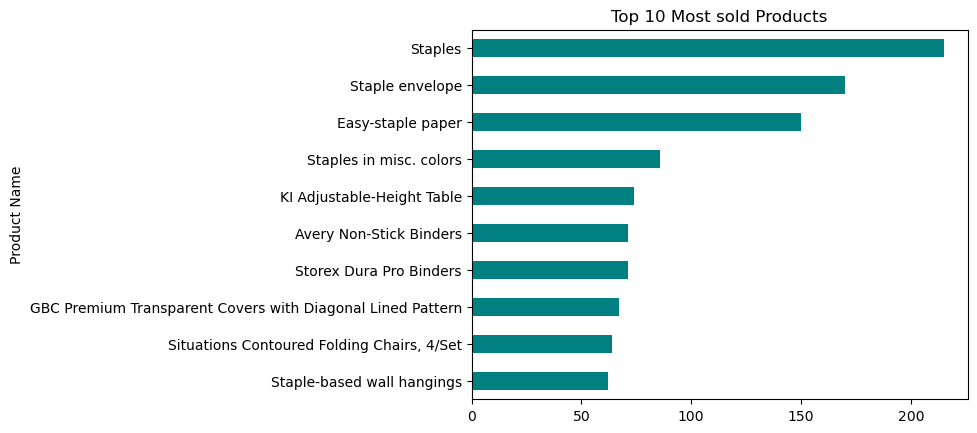

In [39]:
most_sold_products.plot(kind = 'barh', color = 'teal')
plt.title("Top 10 Most sold Products")
plt.gca().invert_yaxis()
plt.show()


## Sales and Profit by Region/State

### Sales by Region

In [40]:
sales_by_region = df.groupby("Region")["Sales"].sum().sort_values(ascending = False).head(10)

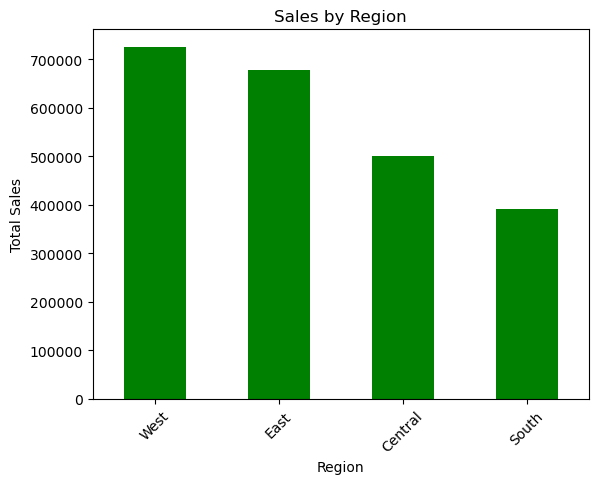

In [45]:
sales_by_region.plot(kind = 'bar', color = 'green')
plt.title("Sales by Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

### Profit by State

In [49]:
profit_by_state = df.groupby("State")["Profit"].sum().sort_values(ascending = False).head(10)


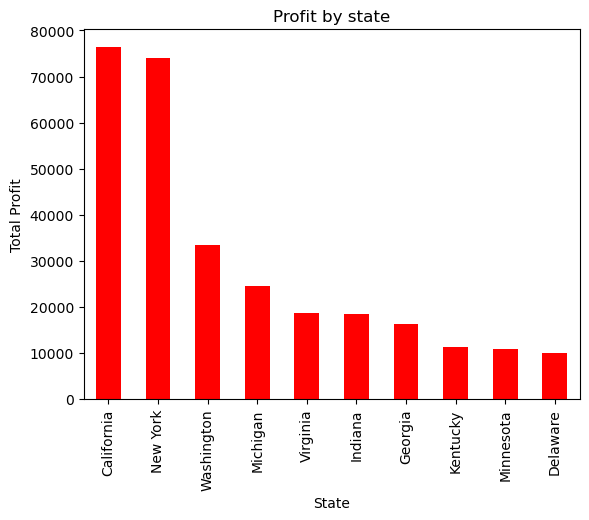

In [56]:
profit_by_state.plot(kind = 'bar', color = 'red')
plt.title("Profit by state")
plt.ylabel("Total Profit")
plt.show()

## Category vs Profit (Heatmap)

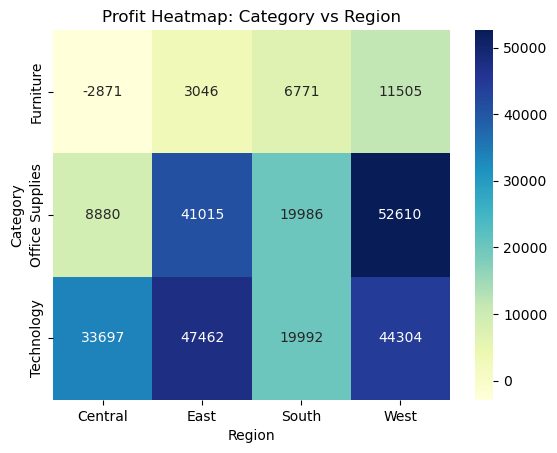

In [58]:
pivot = df.pivot_table(values = 'Profit', index = 'Category', columns = 'Region', aggfunc = 'sum')
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".0f")
plt.title("Profit Heatmap: Category vs Region")
plt.show()

## Time Series: Monthly Sales Trend

In [87]:
print("Shape of df:", df.shape)
print("Column types:\n", df.dtypes)


Shape of df: (0, 19)
Column types:
 Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
City                     object
State                    object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Month                 period[M]
dtype: object


In [88]:
print(df['Order Date'].head(10))


Series([], Name: Order Date, dtype: datetime64[ns])


In [89]:
df = pd.read_csv(r"C:\Users\moham\OneDrive\Desktop\Swinfy Data Science\Projects\RetailIQ-Analytics\data\Superstore.csv", encoding = 'ISO-8859-1')  # Adjust filename if needed
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
print(df[['Order Date']].head())


  Order Date
0 2016-11-08
1 2016-11-08
2 2016-06-12
3 2015-10-11
4 2015-10-11


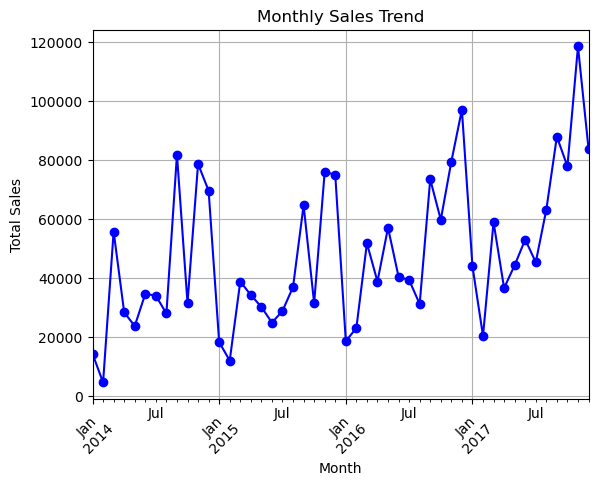

In [93]:
# Add a 'Month' column for time-based analysis
df['Month'] = df['Order Date'].dt.to_period('M')

# Monthly Sales
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind = "line", marker = 'o', color = 'blue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Customer Segment Analysis

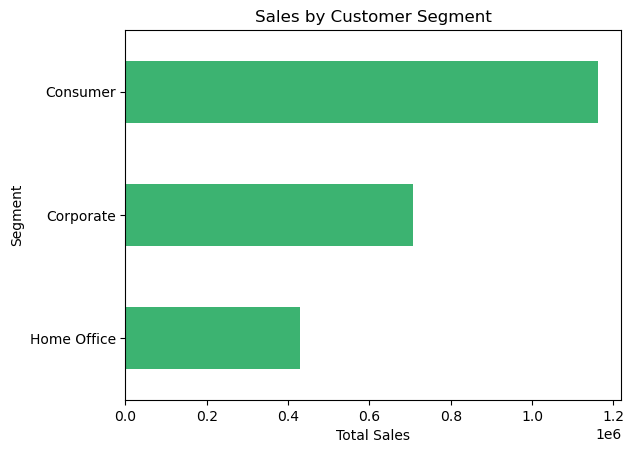

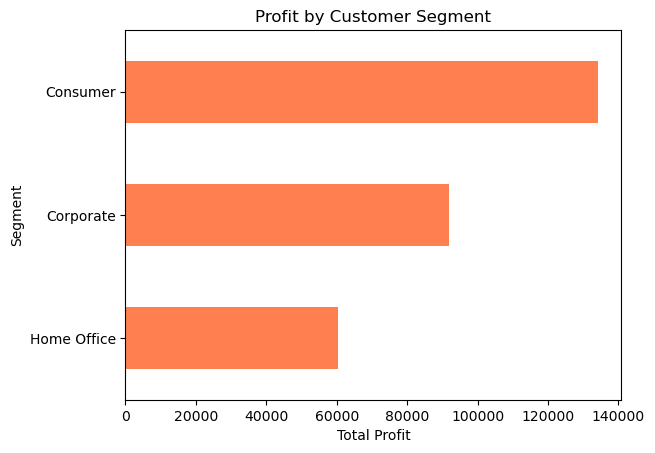

In [94]:
# Sales by Segment
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values()

segment_sales.plot(kind='barh', color='mediumseagreen')
plt.title("Sales by Customer Segment")
plt.xlabel("Total Sales")
plt.show()

# Profit by Segment
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values()

segment_profit.plot(kind='barh', color='coral')
plt.title("Profit by Customer Segment")
plt.xlabel("Total Profit")
plt.show()


## Discount vs Profit (to analyze effect of discounts)

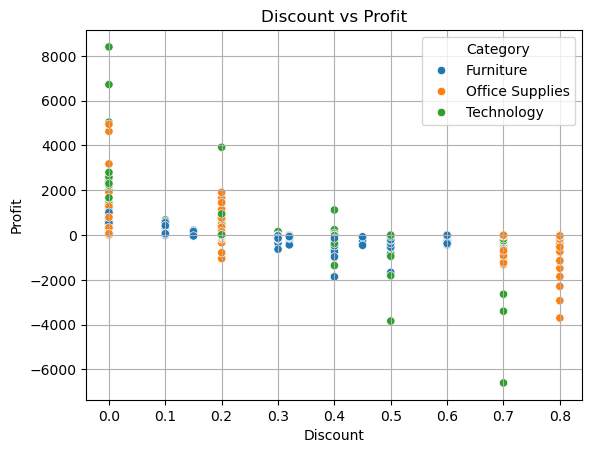

In [95]:
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.show()


## Export Cleaned Data (for SQL & Power BI)

In [96]:
df_export = df.copy()
df_export.to_csv("cleaned_superstore.csv", index = False)